# 使用逻辑回归对鸢尾花进行分类

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()

In [19]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [20]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [21]:
X = iris.data
y = iris.target

In [22]:
X[0:50,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

### 任取两个特征画图

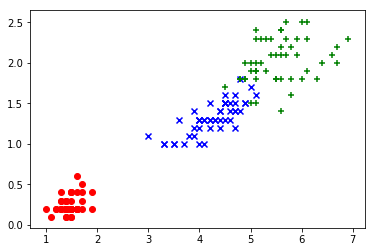

In [23]:
feature = 2
feature_other = 3

plt.scatter(X[0:50,feature], X[0:50,feature_other], color='red', marker='o', label='setosa') #前50个样本
plt.scatter(X[50:100,feature], X[50:100,feature_other], color='blue', marker='x', label='versicolor') #中间50个
plt.scatter(X[100:,feature], X[100:,feature_other],color='green', marker='+', label='Virginica') #后50个样本

In [24]:
### 数据代入模型

In [25]:
model = linear_model.LogisticRegression(C=100.0)
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
print(model.coef_)
print(model.intercept_)
y_hat = model.predict(X)

print("准确度=",accuracy_score(y,y_hat))

[[ 0.93324085  3.11332502 -4.88229005 -2.45215954]
 [-0.18829319 -2.72682648  1.27887901 -2.73646109]
 [-3.24932156 -4.3441865   6.11340386  9.50912922]]
[  0.54646238   6.92214511 -13.23258902]
准确度= 0.98


### 可视化分类结果
为了可视化分类结果，我们取2个特征进行训练

In [28]:
feature = 2
feature_other = 3

X = iris.data
X_2 = X[:,[feature,feature_other]]
y = iris.target

In [38]:
model_2 = linear_model.LogisticRegression(C=100.0)
model_2.fit(X_2,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
#meshgrid函数生成两个网格矩阵
h = .02
x_min, x_max = X[:, feature].min() - .5, X[:, feature].max() + .5
y_min, y_max = X[:, feature_other].min() - .5, X[:, feature_other].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [50]:
y_max

3.0

In [40]:
xx

array([[0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38],
       [0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38],
       [0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38],
       ...,
       [0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38],
       [0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38],
       [0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38]])

In [41]:
yy

array([[-0.4 , -0.4 , -0.4 , ..., -0.4 , -0.4 , -0.4 ],
       [-0.38, -0.38, -0.38, ..., -0.38, -0.38, -0.38],
       [-0.36, -0.36, -0.36, ..., -0.36, -0.36, -0.36],
       ...,
       [ 2.94,  2.94,  2.94, ...,  2.94,  2.94,  2.94],
       [ 2.96,  2.96,  2.96, ...,  2.96,  2.96,  2.96],
       [ 2.98,  2.98,  2.98, ...,  2.98,  2.98,  2.98]])

注意: [[1,2,3]]表示一行三列，[1,2,3]表示3行一列，所以下面代码要执行xx.ravel()

In [42]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 0.5 , -0.4 ],
       [ 0.52, -0.4 ],
       [ 0.54, -0.4 ],
       ...,
       [ 7.34,  2.98],
       [ 7.36,  2.98],
       [ 7.38,  2.98]])

In [51]:
z = model_2.predict(np.c_[xx.ravel(), yy.ravel()])

In [52]:
z

array([0, 0, 0, ..., 2, 2, 2])

In [44]:
z = z.reshape(xx.shape)

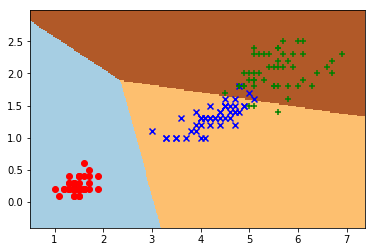

In [45]:
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)

plt.scatter(X[0:50,feature], X[0:50,feature_other], color='red', marker='o', label='setosa') #前50个样本
plt.scatter(X[50:100,feature], X[50:100,feature_other], color='blue', marker='x', label='versicolor') #中间50个
plt.scatter(X[100:,feature], X[100:,feature_other],color='green', marker='+', label='Virginica') #后50个样本
